In [1]:
import gudhi
import matplotlib.pyplot as plt
import networkx as nx
from math import sqrt
import numpy as np
import pandas as pd

In [2]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict 
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }
        
    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')
    
def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''    
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = 'True'):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

We start by considering a simplicial complex S that is a triangulation of the circle. 

In [3]:
simpcomplex = gudhi.SimplexTree()
print(simpcomplex)

In [4]:
for i in range(3):
    simpcomplex.insert([i])

In [5]:
PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]


In [6]:
simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

In [7]:
PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


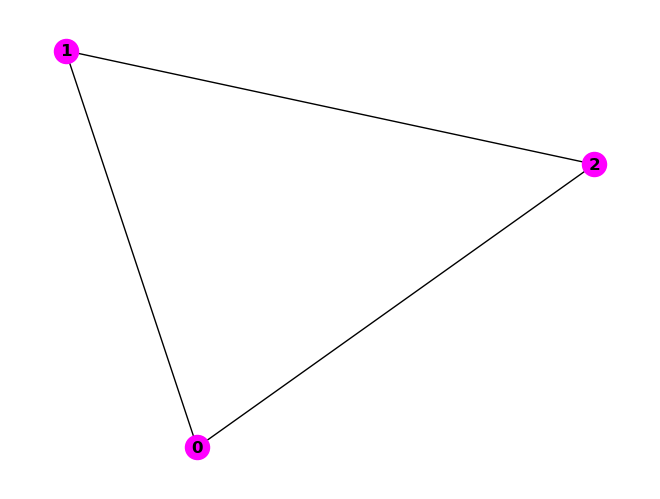

In [8]:
DrawSimplicialComplex(simpcomplex)

If a simplex is added to the complex, then all its faces are;
Hence we can use the simpler code:

In [9]:
simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,0])

PrintSimplices(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [10]:
# We can do it even faster, by using the remove_maximal_simplex function:

simpcomplex3 = gudhi.SimplexTree()

simpcomplex3.insert([0,1,2])
simpcomplex3.remove_maximal_simplex([0,1,2])

PrintSimplices(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


## Computing topological invariants

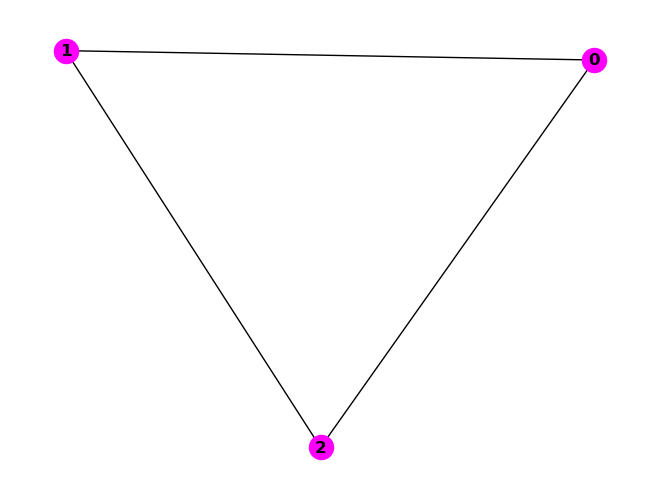

In [11]:
simpcomplexdim2 = gudhi.SimplexTree()

simpcomplexdim2.insert([0,1,2])

DrawSimplicialComplex(simpcomplexdim2)

In [12]:
NumberOfConnectedComponents(simpcomplex, verbose=True)

The simplicial complex admits 1 connected component(s).


1

In [13]:
# The following function returns the Euler characteristic of the complex.
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

## Exercises

### Exercise 22
Build triangulations of the alphabet letters, and compute their Euler characteristic.

Given two letters that are homotopy equivalent, is it true thar their Euler characteristic are equal? Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?



The simplicial complex has Euler characteristic equal to 0.


0

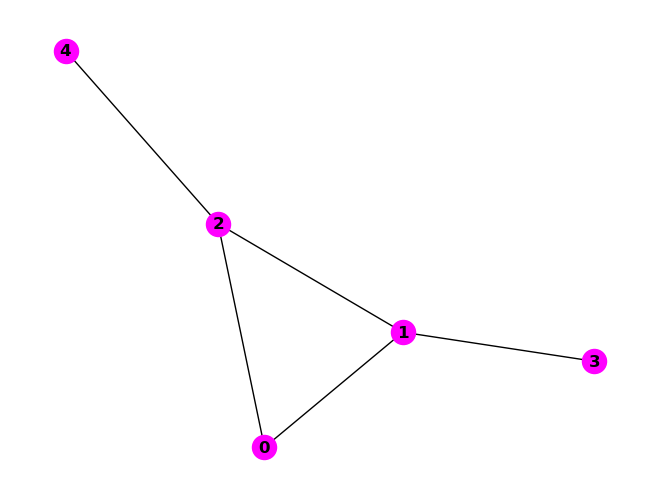

In [31]:
# triangulation of letter A
simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([0, 2])
simpcomplex.insert([1, 2])
simpcomplex.insert([1, 3])
simpcomplex.insert([2, 4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to -1.


-1

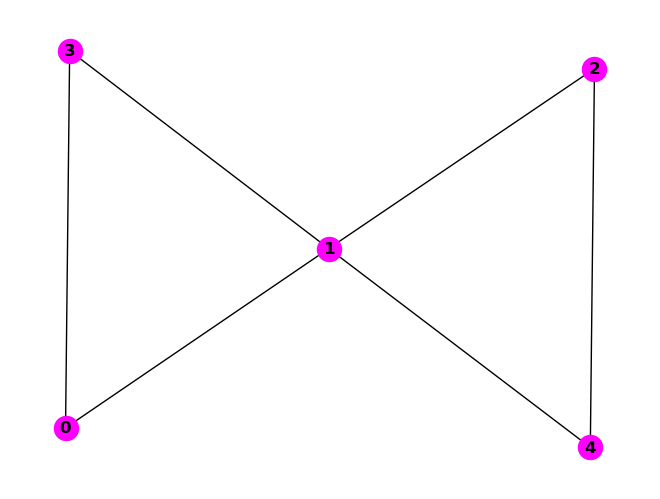

In [14]:
# triangulation of letter B

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([1, 2])
simpcomplex.insert([1, 3])
simpcomplex.insert([1, 4])
simpcomplex.insert([2, 4])
simpcomplex.insert([3, 0])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

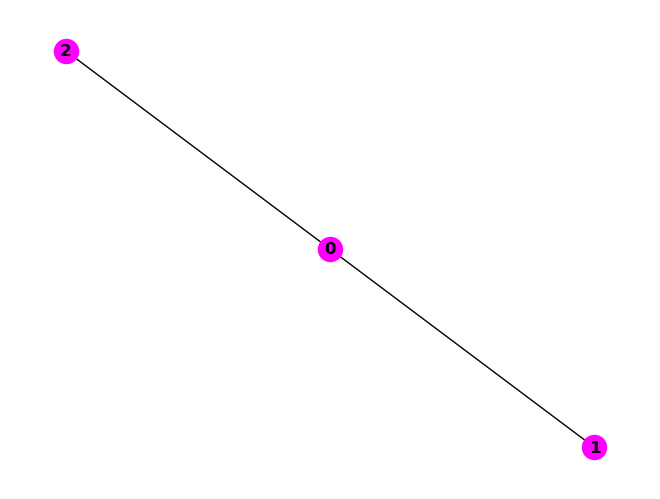

In [33]:
# triangulation letter C

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([0, 2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

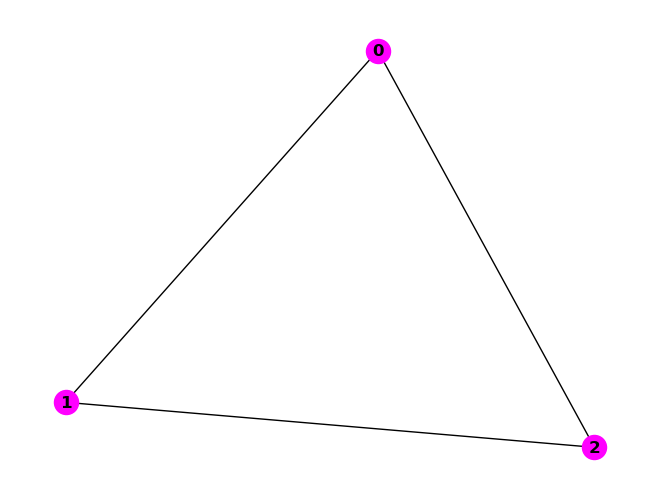

In [34]:
# triangulation letter D

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([0, 2])
simpcomplex.insert([1, 2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

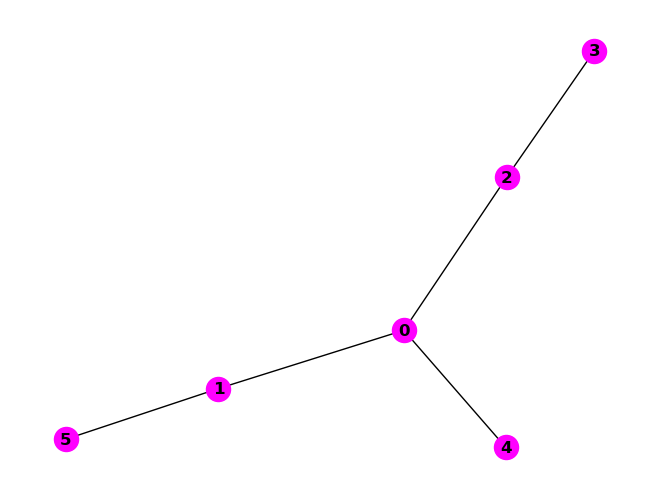

In [35]:
# triangulation letter E

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([0, 2])
simpcomplex.insert([1, 5])
simpcomplex.insert([0, 4])
simpcomplex.insert([2, 3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

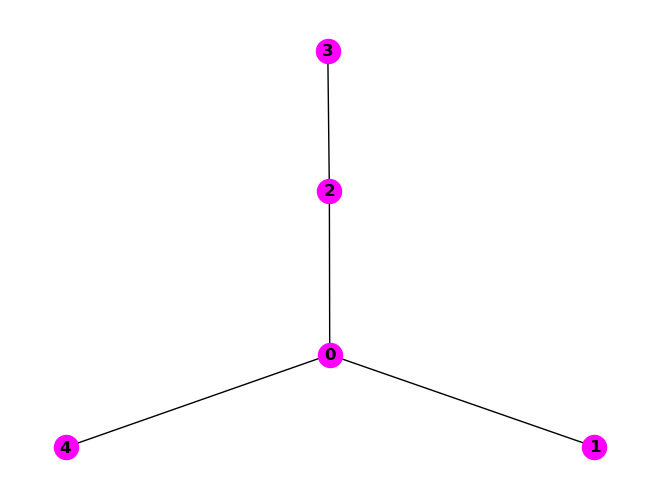

In [36]:
# triangulation letter F

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([0, 2])
simpcomplex.insert([2, 3])
simpcomplex.insert([0, 4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

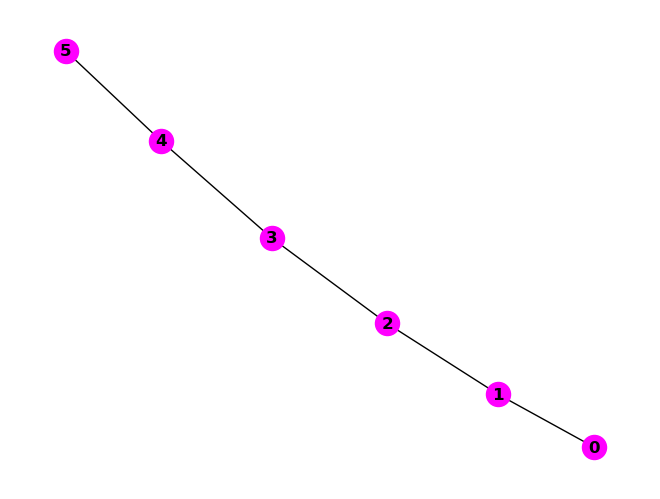

In [39]:
# triangulation letter G

simpcomplex = gudhi.SimplexTree()
                  
for i in range(5):
    simpcomplex.insert([i, i+1])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

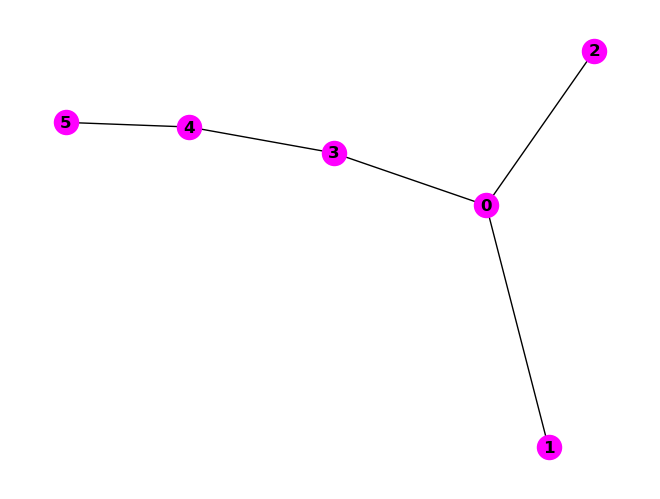

In [40]:
# triangulation letter H

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([0, 2])
simpcomplex.insert([0, 3])
simpcomplex.insert([3, 4])
simpcomplex.insert([4, 5])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

#### Exercise 23
For every n, triangulate the bouquet of n circles (see below).
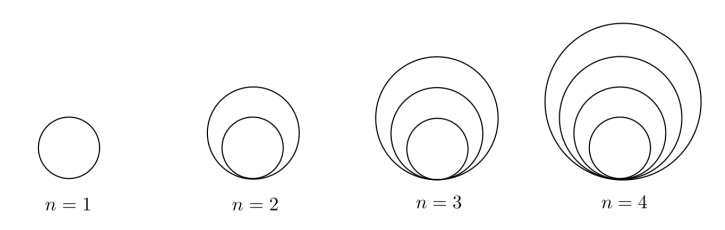
Compute their Euler characteristic

In [15]:
# For n = 1
simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

The simplicial complex has Euler characteristic equal to 0.


0

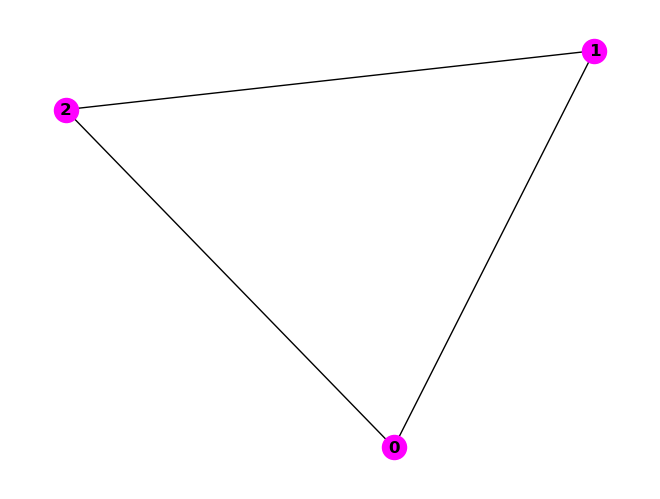

In [16]:
DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

In [17]:
# For n = 2
# Note that we have the relation 2n - 1 for the triangulation of the circles for n > 1
simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([0,2])
simpcomplex2.insert([1,3])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,4])
simpcomplex2.insert([3,4])

True

The simplicial complex has Euler characteristic equal to -1.


-1

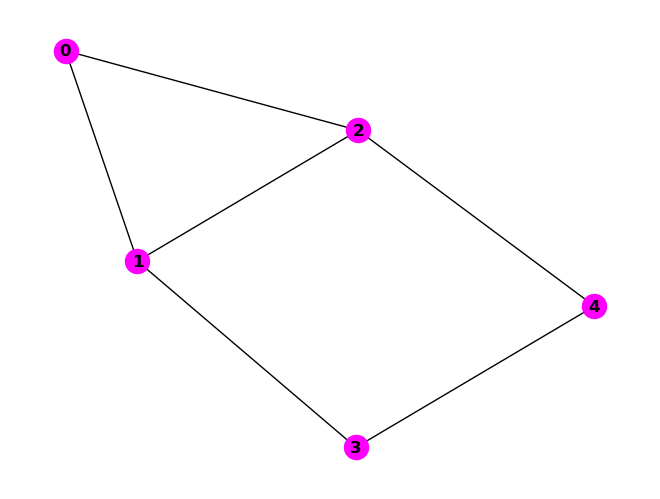

In [18]:
# PrintSimplices(simpcomplex2)
DrawSimplicialComplex(simpcomplex2)
EulerCharacteristic(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2], [3], [4], [5], [6]
Dimension 1: [0, 1], [0, 2], [1, 2], [1, 3], [2, 4], [3, 4], [3, 5], [4, 6], [5, 6]
The simplicial complex has Euler characteristic equal to -2.


-2

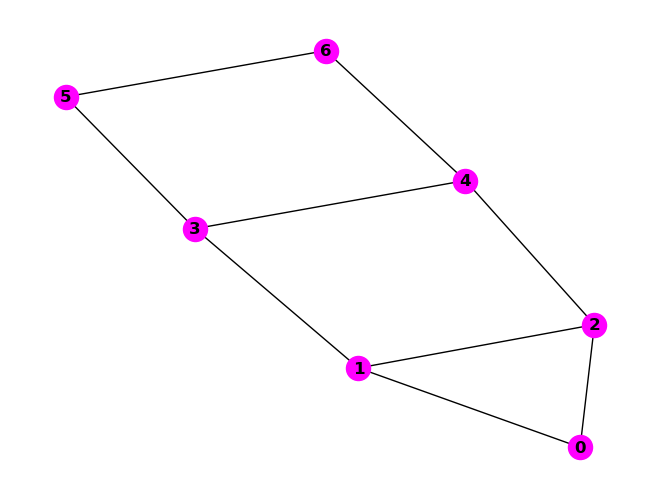

In [19]:
# For n = 3
simpcomplex3 = simpcomplex2
simpcomplex3.insert([3,5])
simpcomplex3.insert([4,6])
simpcomplex3.insert([5,6])

PrintSimplices(simpcomplex3)
DrawSimplicialComplex(simpcomplex3)
EulerCharacteristic(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2], [3], [4], [5], [6]
Dimension 1: [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [1, 2], [3, 4], [5, 6]
The simplicial complex has Euler characteristic equal to -2.


-2

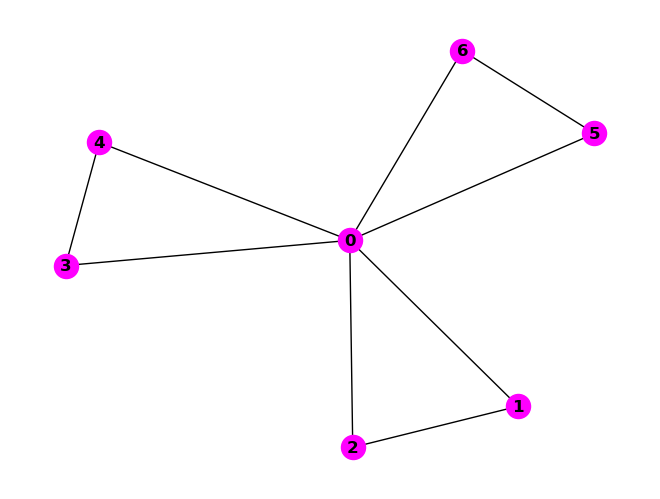

In [20]:
n = 3
sc = gudhi.SimplexTree()
sc.insert([0])

for i in range(n):
    sc.insert([0, 2*i+1])
    sc.insert([0, 2*i+2])
    sc.insert([2*i+1, 2*i+2])
    
PrintSimplices(sc)    
DrawSimplicialComplex(sc)
EulerCharacteristic(sc)

### Exercise 24
Implement the triangulation of the torus given in the notes. Compute its Euler characteristic.
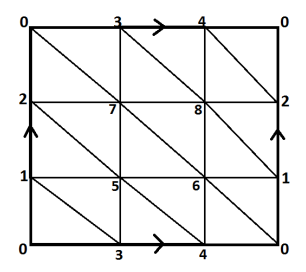

The simplicial complex has Euler characteristic equal to 0.


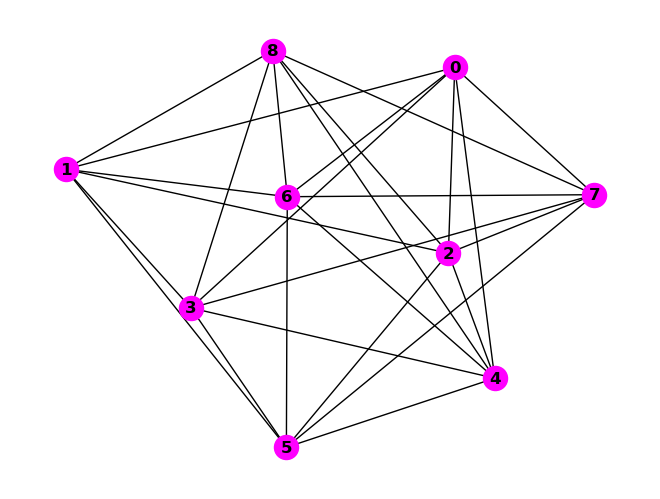

In [21]:
torus = gudhi.SimplexTree()

torus.insert([0,3,7])
torus.insert([0,2,7])
torus.insert([2,7,5])
torus.insert([2,1,5])
torus.insert([1,5,3])
torus.insert([0,1,3])

torus.insert([3,4,8])
torus.insert([3,7,8])
torus.insert([7,8,6])
torus.insert([7,5,6])
torus.insert([5,6,4])
torus.insert([5,4,3])

torus.insert([4,0,2])
torus.insert([4,2,8])
torus.insert([8,2,1])
torus.insert([8,1,6])
torus.insert([6,1,0])
torus.insert([6,4,0])

EulerCharacteristic(torus)

DrawSimplicialComplex(torus)

### Exercise 25
Consider the following dataset of 30 points $x_0, ..., x_{29}$ in $\mathbb{R}^2$

In [22]:
dataset = {0: [0.29409772548731694, 0.6646626625013836],
1: [0.01625840776679577, 0.1676405753593595],
2: [0.15988905150272759, 0.6411323760808338],
3: [0.9073191075894482, -0.16417982219713312],
4: [-0.18661467838673884, 0.31618948583046413],
5: [-0.3664040542098381, 0.9098590694955988],
6: [-0.43753448716144905, -0.8820102274699417],
 7: [0.4096730199915961, -0.23801426675264126],
8: [0.5903822103474676, -0.7285102954232894],
9: [0.9133851839417766, -0.6606557328320093],
10: [-0.15516122940597588, 0.7565411235103017],
11: [-0.38626186295039866, -0.3662321656058476],
12: [0.005209710070218199, 0.27655964872153116],
13: [0.670078068894711, -0.00932202688834849],
14: [-0.011268465716772091, 0.24340880308017376],
15: [-0.6441978411451603, -0.9672635759413206],
16: [-0.2841794022401025, -0.6734801188906114],
17: [-0.15473260248990717, -0.1365357396855129],
18: [0.7177096105982121, 0.9378197891592468],
19: [-0.4677068504994166, 0.1533930130294956],
20: [-0.32379909116817096, 0.9694800649768063],
21: [-0.2886940472879451, -0.039544695812395725],
22: [-0.5900701743351606, 0.8350804500575086],
23: [0.14931959728335853, 0.869106793774487],
24: [-0.14500672678238824, -0.3170082291070364],
25: [0.07324547392476122, 0.6653572287065117],
26: [-0.662990048258566, 0.1908198608241125],
27: [-0.25641262456436276, -0.9844196180941553],
28: [-0.5105685407819842, -0.4236604017060557],
29: [0.6792549581008038, -0.026215820387260003]}

In [23]:
def g_of_r(r, data=dataset):
    result = {}
    sc = gudhi.SimplexTree()
    for i in data:
        for j in data:
            if i != j:
                key = (i, j)
                data[i] = np.array(data[i])
                data[j] = np.array(data[j])
                result[key] = np.linalg.norm(data[i] -  data[j])
                if result[key] <= r:
                    sc.insert([i, j])
    return sc

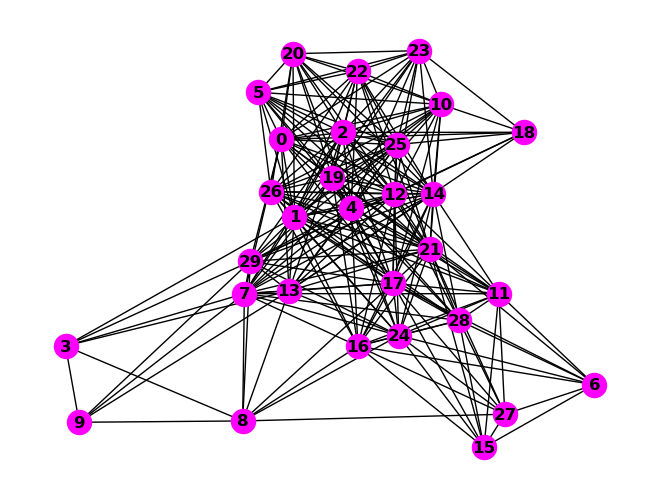

In [24]:
r = 1.0
DrawSimplicialComplex(g_of_r(r))

### Exercise 26

In [25]:
import random
from itertools import combinations

In [26]:
def RandomGraph(n, p):
    V = list(range(n))
    random_sc = gudhi.SimplexTree()
    for i in range(n):
        random_sc.insert([i])
    for v in combinations(V, 2):
        if random.random()<p:
            random_sc.insert(list(v))

    EulerCharacteristic(random_sc)
    NumberOfConnectedComponents(random_sc)
    DrawSimplicialComplex(random_sc)
    #PrintSimplices(random_sc)

The simplicial complex has Euler characteristic equal to -6.
The simplicial complex admits 1 connected component(s).


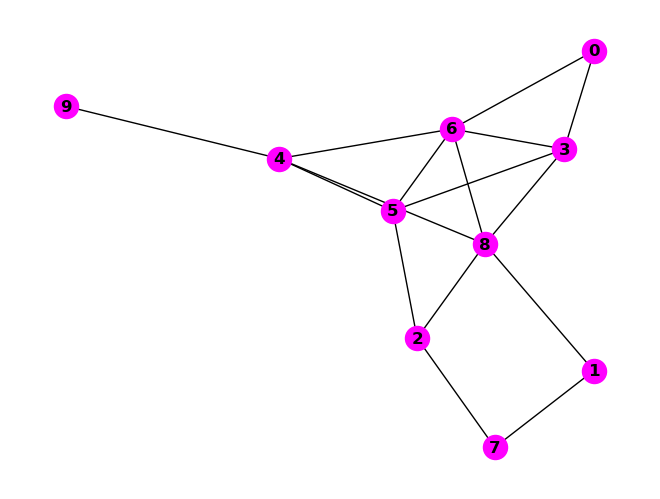

In [27]:
RandomGraph(n=10, p=0.3)

The simplicial complex has Euler characteristic equal to -34.
The simplicial complex admits 1 connected component(s).


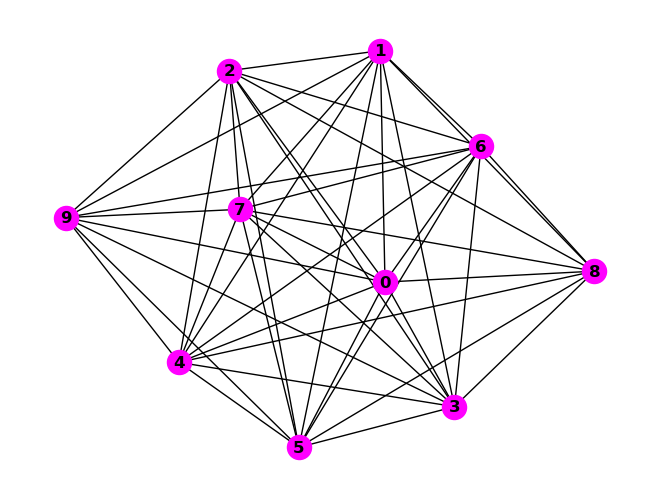

In [28]:
RandomGraph(n=10, p=random.random()) # p com um valor aleatório entre 0 e 1

The simplicial complex has Euler characteristic equal to -136.
The simplicial complex admits 2 connected component(s).


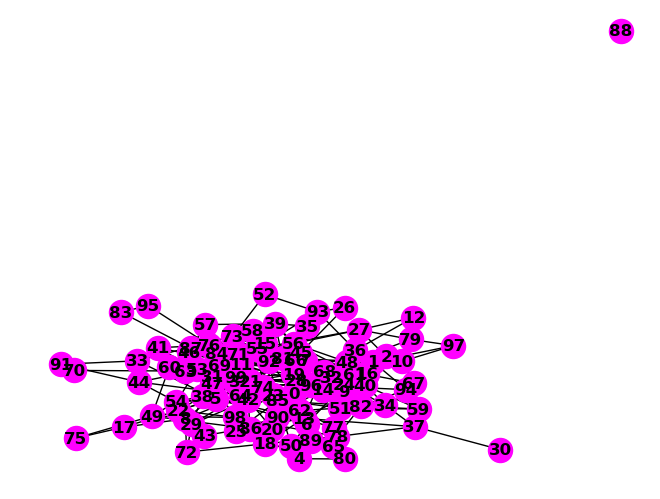

In [29]:
RandomGraph(n=100, p=0.05)

The simplicial complex has Euler characteristic equal to -343.
The simplicial complex admits 1 connected component(s).


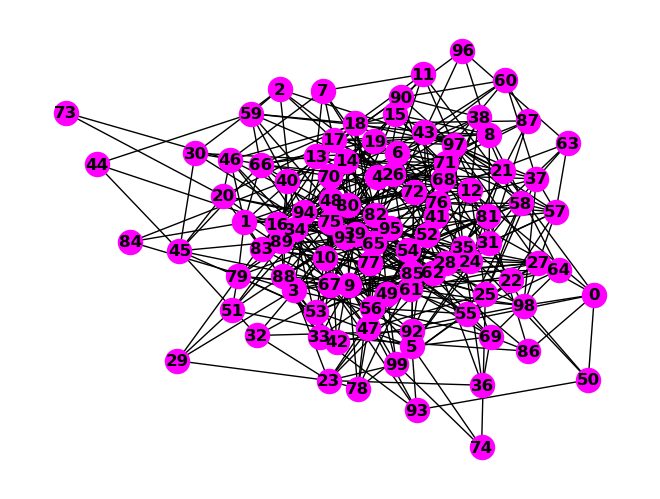

In [30]:
RandomGraph(n=100, p=random.random())